In [1]:
!pip install -q tflite-model-maker

In [3]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

In [4]:
data = DataLoader.from_folder("C:\\Users\\rizky\\Bangkit2021\\Datasets\\Source\\Mixed\\Train")
train_data, test_data = data.split(0.95)

INFO:tensorflow:Load image with size: 164199, num_label: 26, labels: A, B, C, D, E, F, G, H, I, J, K, L, M, N, O, P, Q, R, S, T, U, V, W, X, Y, Z.


In [8]:
model = image_classifier.create(train_data, model_spec=model_spec.get('mobilenet_v2'))

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_2 (HubK (None, 1280)              2257984   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 26)                33306     
Total params: 2,291,290
Trainable params: 33,306
Non-trainable params: 2,257,984
_________________________________________________________________
None
Epoch 1/5
4874/4874 [==============================] - 522s 106ms/step - loss: 0.8413 - accuracy: 0.9589
Epoch 2/5
4874/4874 [==============================] - 512s 105ms/step - loss: 0.7611 - accuracy: 0.9813
Epoch 3/5
4874/4874 [==============================] - 511s 105ms/step - loss: 0.7477 - accuracy: 0.9848
Epoch 4/5
4874/4874 [============================

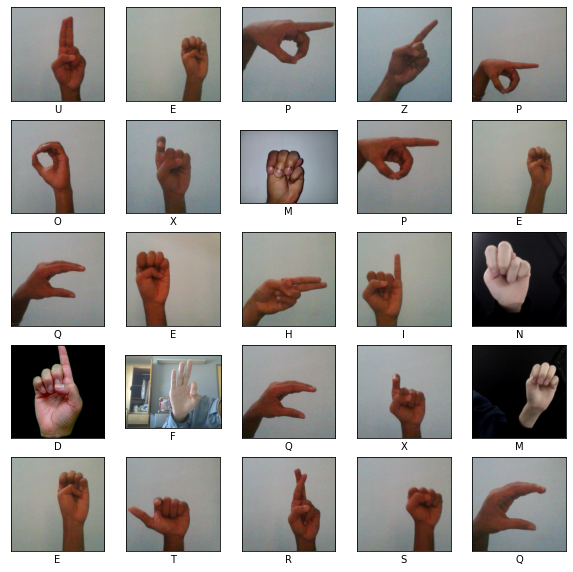

In [9]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [10]:
loss, accuracy = model.evaluate(test_data)

257/257 [==============================] - 102s 103ms/step - loss: 0.7064 - accuracy: 0.9918


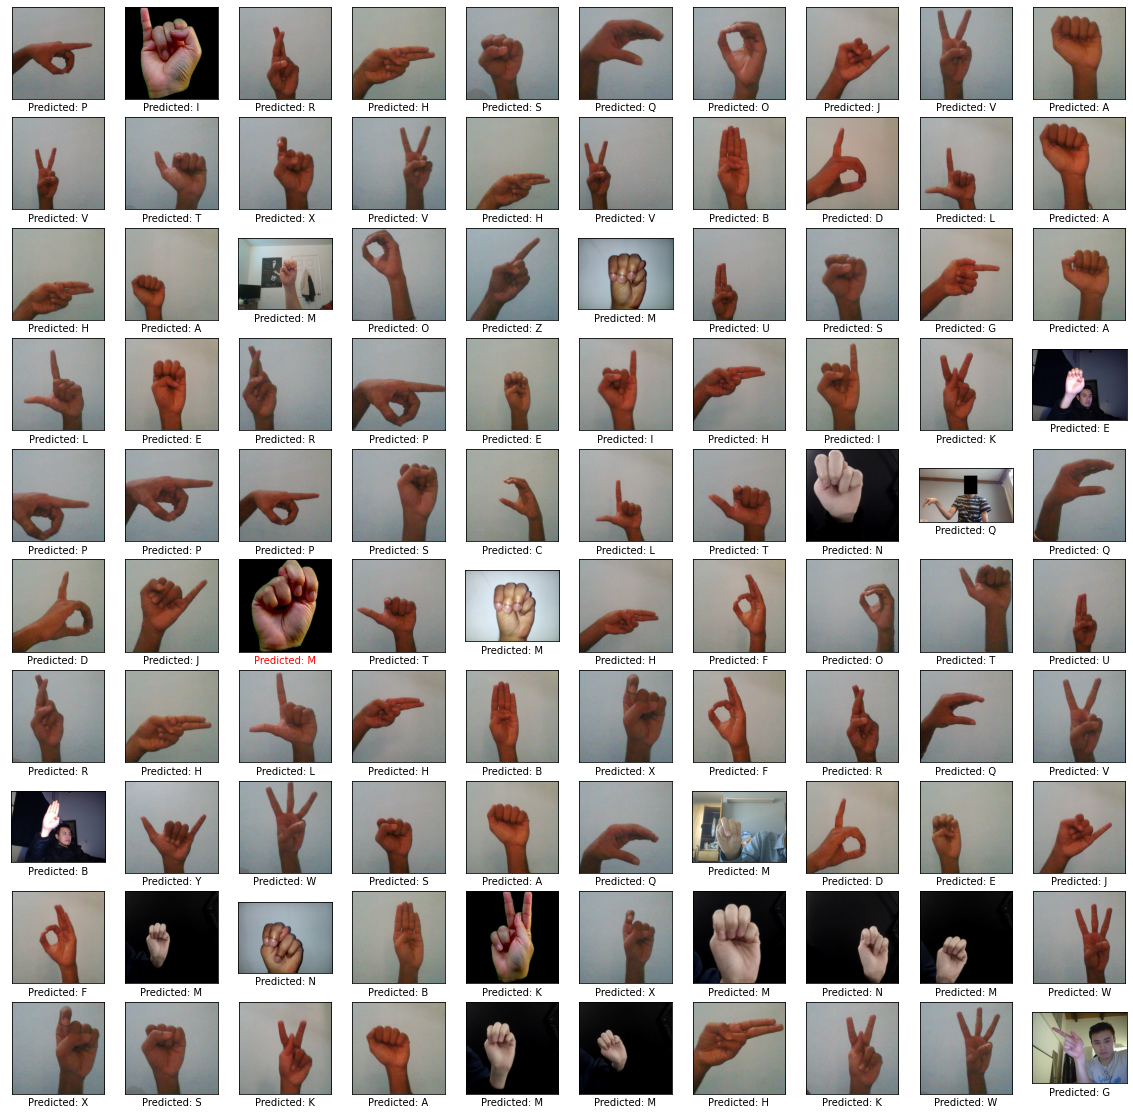

In [11]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [12]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: C:\Users\rizky\AppData\Local\Temp\tmp6seqfx7s\assets


INFO:tensorflow:Assets written to: C:\Users\rizky\AppData\Local\Temp\tmp6seqfx7s\assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in C:\Users\rizky\AppData\Local\Temp\tmp378fh9hm\labels.txt


INFO:tensorflow:Saving labels in C:\Users\rizky\AppData\Local\Temp\tmp378fh9hm\labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: .\model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: .\model.tflite


In [ ]:
model.evaluate_tflite('model.tflite', test_data)